In [2]:
from fastai.vision.all import *
from fastai.vision.widgets import *

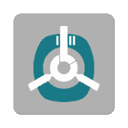

In [25]:
imgLauncher = PILImage.create('ic_launcher.png')
display(imgLauncher.to_thumb(128,128))

# OdarTec Cannula Classifier!

If you need to know whether a cannula has embossings or not - upload an image of a cannula and see the result.

----

In [26]:
path = Path()
learn_inf = load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [27]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [28]:
btn_upload.observe(on_data_change, names=['data'])

In [29]:
display(VBox([widgets.Label('Select your cannula!'), btn_upload, out_pl, lbl_pred]))